In [1]:
# téléchargement

from pymatgen.symmetry import analyzer as az
from pymatgen.ext.matproj import MPRester
import pymatgen.analysis.diffraction.xrd as xr
from matplotlib import pyplot as plt

cle_materiau = "mp-20072"
cle_utilisateur = "om6hvHlirPcyuxXF"

with MPRester(cle_utilisateur) as m:
    structure = m.get_structure_by_material_id(cle_materiau)
    structure = az.SpacegroupAnalyzer(structure).get_primitive_standard_structure()

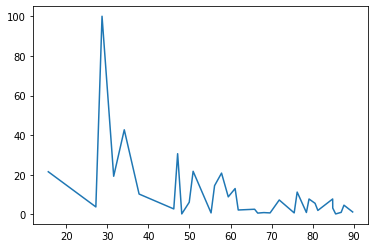

In [2]:
calc = xr.XRDCalculator()
pat = calc.get_pattern(structure)

y = pat.y
plt.plot(pat.x,y)
plt.show()

In [9]:
# petite fonction utilitaire avec exemple

def get_max_indexes(a, number=1):
    """
    donne dans un tableau les indices des 'numbers' premiers maximums du tableau 'a'
    par défaut, la fonction renvoie le maximum du tableau (numbers = 1)
    """
    index = [-1]*number
    init_value = min(a)
    
    for i in range(number):
        maxi = init_value
        index_max = -1
        for j in range(len(a)):
            if a[j] > maxi and j not in index:
                maxi = a[j]
                index_max = j
        index[i] = index_max
    
    return index
    

# exemple 

a = [0,500,8,-5,12]
print('si a =')
print(a)
print('et numbers = 2, le résultat est :')
print(get_max_indexes(a,2))
print('ce qui donne bien les indices des 2 plus grandes valeurs du tableau')

si a =
[0, 500, 8, -5, 12]
et numbers = 2, le résultat est :
[1, 4]
ce qui donne bien les indices des 2 plus grandes valeurs du tableau


In [10]:
index = get_max_indexes(y,3)
    
hkls = pat.hkls
for i in index:
    dict = hkls[i][0]
    print('max : '+str(round(y[i],2))+'   indices hkl : '+str(dict['hkl'])+'   multiplicité : '+str(dict['multiplicity']))

max : 100.0   indices hkl : (1, 1, 0)   multiplicité : 6
max : 42.72   indices hkl : (2, 1, 1)   multiplicité : 6
max : 30.65   indices hkl : (1, 0, -1)   multiplicité : 6
